## Exploratory Data Analysis (EDA)

This notebook consist of exploratory data analysis on Teleco customer dataset, and include notes on findings/ intersting trends. We have also asked few questions, developed hypothesis to draw conclusions and insights.

---

**Import packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
sns.set(style = 'white')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../data"))

['.DS_Store', 'transformed_data.csv', 'Telco-Customer-Churn.csv', 'processed_data.csv', 'scaled_data.csv', '.ipynb_checkpoints']


**Load the dataset,**

In [4]:
telecom_cust = pd.read_csv('../data/Telco-Customer-Churn.csv')

**Preview the data**

In [5]:
telecom_cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Insights**

Data types:
- All features are string or boolean type, except SeniorCitizen, tenure, MonthlyCharges and TotalCharges.
- These 4 columns are of int/ float type.
- We have to convert all features into numerical type as many machine learning models need data to be in numbers.
- We might have to bring all features on similar scale (MinMax scaler is a possiblity).

Let's check number of samples and features we have,

In [6]:
print('Dimensions of dataset:',telecom_cust.shape)
print('Number of Customers:',telecom_cust.customerID.nunique())

Dimensions of dataset: (7043, 21)
Number of Customers: 7043


We have dataset with 7043 observations and for every observation there are 20 features.  

In [7]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# column/ feature values
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

We can see we have lot information about coustomers, for eg: their gender, whether they are senior citizen or not, they have partners or dependents or not, tenure of their contract with the company and what other kinds of services they use (internet, straming TV, online backup etc.) and then finally how much they pay monthly and their total charges.

In [9]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

**Check for any missing values**

In [11]:
# Check missing values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From above output, we can say that there are 11 missing values for Total Charges. We can either replace or remove these 11 observations; we choose to remove these 11 observations as 11 is a small number and this won't effect representation of our dataset.

In [12]:
# Removing missing values 
telecom_cust.dropna(inplace = True)

*customer IDs* column is of no use in predicting churn rate, so we will get rid off it.

In [13]:
# Remove customer IDs from the data set
df = telecom_cust.iloc[:,1:]

Convert predictor variable, *Churn* into a binary numeric variable (YES/NO --> 1/0)

In [14]:
# Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [15]:
# Let's convert all the categorical variables into dummy variables
telecom_cust_dummies = pd.get_dummies(df)

**Peek into clean data,**

In [16]:
telecom_cust_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Correlation**

Let's check the correlation of predictior variable *Churn* with all other features in the dataset, this will give us some idea how all the features are related to predictor label.

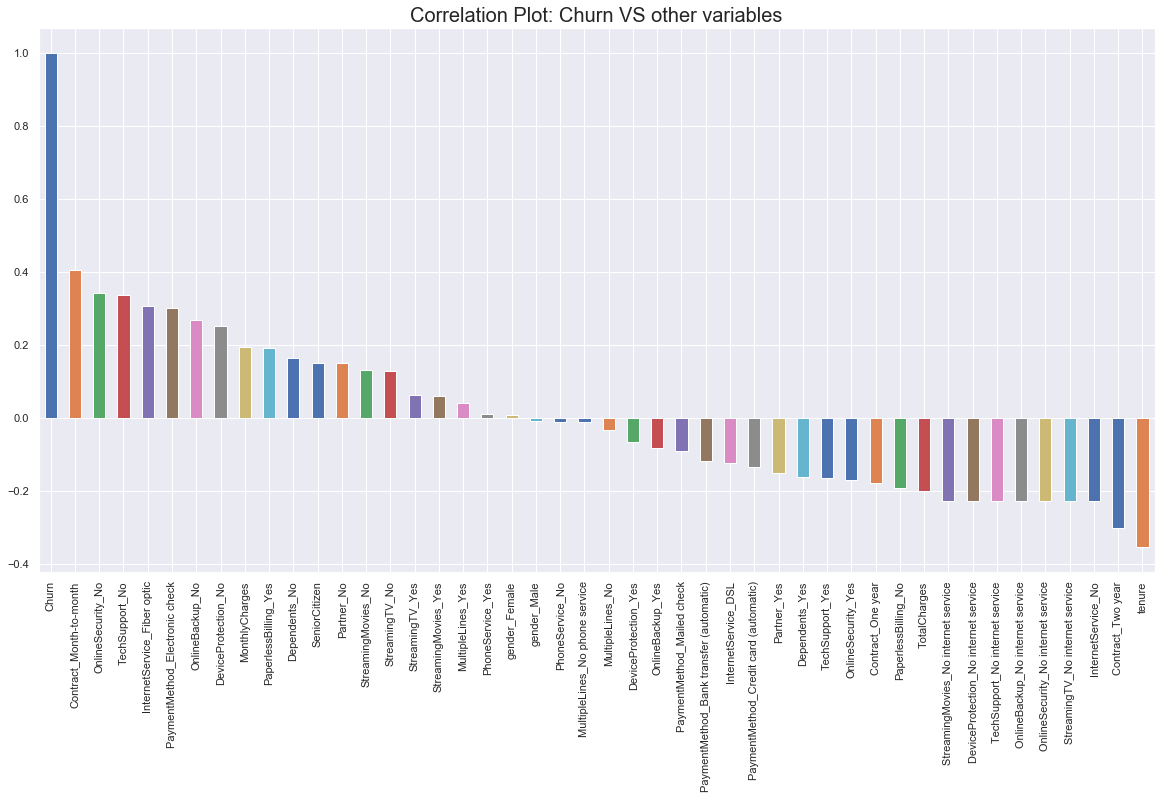

In [17]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
plt.title('Correlation Plot: Churn VS other variables',fontsize=20)
telecom_cust_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Insights**

From above plot we can see that, 
- *Month to month contracts*, *absence of online security* and *tech support* seem to be positively correlated with churn. 
- While, tenure, two year contracts seem to be negatively correlated with churn.
- Interestingly, services such as *Online security, streaming TV, online backup, tech support*, etc. without internet connection seem to be negatively related to churn.

----

### Data Exploration:

By now, we have some idea about what kind of data we have. Let's explore individual variables and then slice and dice our data for any interesting trends.

1. Demographics: Understanding the gender, age range, patner and dependent status of the customers.
2. Customer Account Information: We will look at the tenure, contract of all accounts.
3. Many customers have used different services, we will analyze their distributions.
4. Explore important variables that were seen to have strong relationship with predictor variable (Churn) in the correlation plot.

**A.) Demographics ** - Understanding the gender, age range, patner and dependent status of the customers.

1. **Gender Distribution** - 

Text(0.5,1,'Gender Distribution')

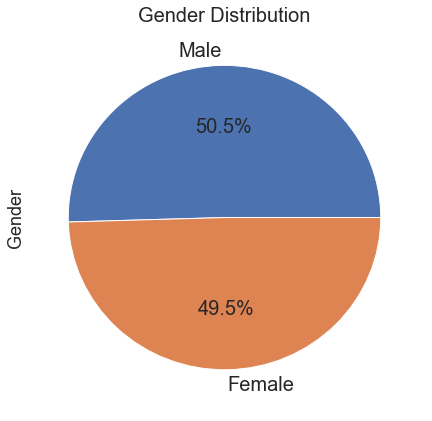

In [18]:
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', 
                                                                                      labels = ['Male', 'Female'],
                                                                                      figsize=(7,7), 
                                                                                      fontsize = 20)              
# set labels, title
ax.set_ylabel('Gender',fontsize=18)
ax.set_title('Gender Distribution',fontsize=20)

Roughly 50% of customers are male and female in our dataset. This is good, as our dataset is representative of both male and feamle, it will be easy to extend/ draw conclusion. We will not have any bias, atleast because of gender.

**2. % Senior Citizens**

Text(0.5,1,'Percentage of Senior Citizens')

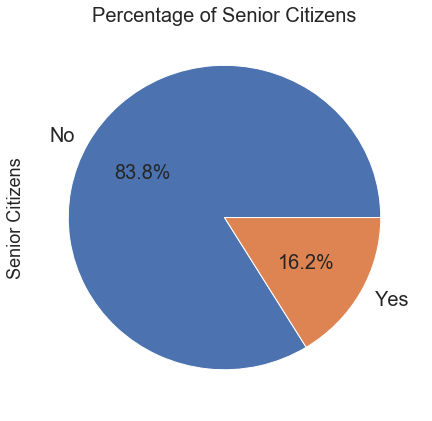

In [19]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', 
                                                                                      labels = ['No', 'Yes'],
                                                                                      figsize=(7,7), 
                                                                                      fontsize = 20 )                                                                           
# set title, labels
ax.set_ylabel('Senior Citizens', fontsize = 18)
ax.set_title('Percentage of Senior Citizens', fontsize = 20)

Most of customers in our dataset are young people. Only 16% of the customers who are senior citizens.

**3. Customers with Partner and Dependent status**

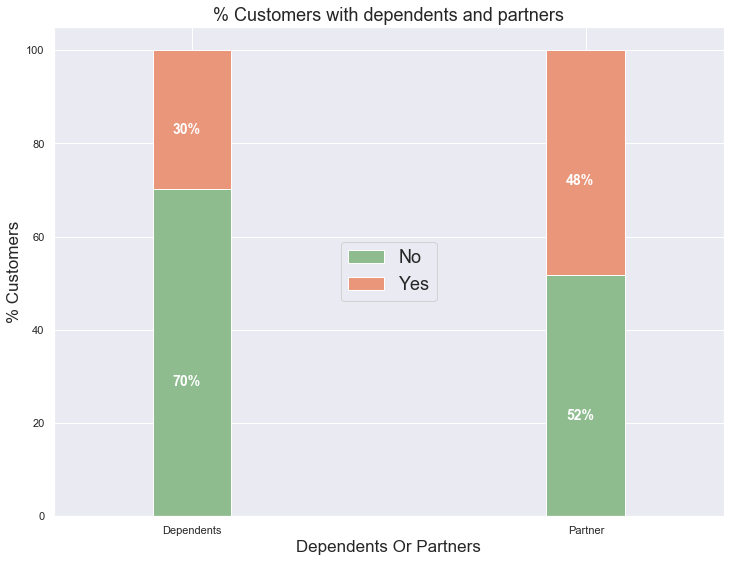

In [20]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)

colors = ['#8FBC8F','#E9967A']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(12,9),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Customers',size = 17)
ax.set_xlabel('Dependents Or Partners', size = 17)
ax.set_title('% Customers with dependents and partners',size = 18)
ax.legend(loc = 'center',prop={'size':18})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Insights**
- 50% of the total customers have a partner.
- 30% of the total customers have dependent. 

**Q.** What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.

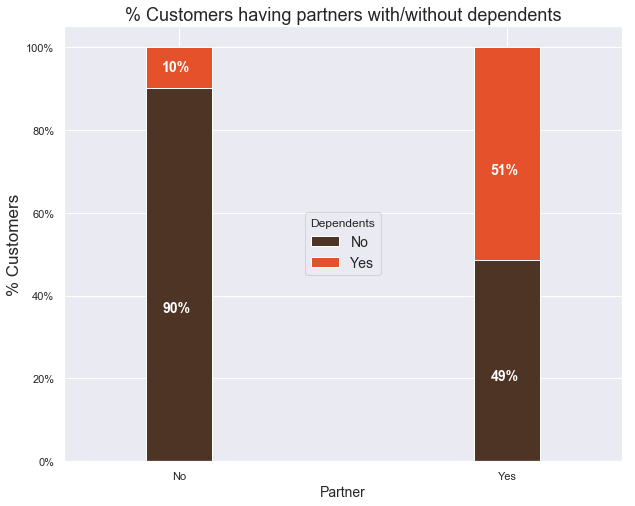

In [21]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,8),
                                                                color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =17)
ax.set_ylabel('% Customers',size = 17)
ax.set_title('% Customers having partners with/without dependents',size = 18)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Insights**
- Among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. 
- Customers who do not have any partner, a majority (80%) of them do not have any dependents.

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

**B.) Customer Account Information**:

Let's explore customer account information, this will give use some clues about how/ which kind of customers are like to leave/ churn.

 **1. Tenure:**

Text(0.5,1,'# of Customers by their tenure')

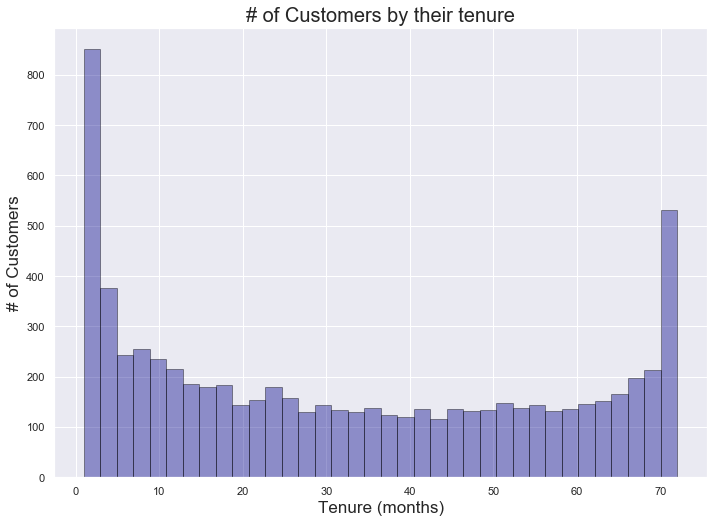

In [22]:
ax = sns.distplot(telecom_cust['tenure'], 
                  hist=True, kde=False, 
                  bins=int(180/5), color = 'darkblue', 
                  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

# set labels, title
ax.set_ylabel('# of Customers',fontsize =17)
ax.set_xlabel('Tenure (months)',fontsize =17)
ax.set_title('# of Customers by their tenure',fontsize =20)

After looking at the histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. 

This could be because customers usually tend to decide whether they want to stay with company or not in first 2-3 month time. Also, customers who are in monthly contract they tend to leave early as it is easy for them to leave, wherease customers who are in yearly contract, it's difficult for them to leave, so they usally end up styaing for long.

**NOTE:** We cannot say customers who have stayed till 60-70 months with telco are loyal customer, maybe they were bounded by yearly contract and as a result couldn't leave in between. This will required more investigation.


**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

Text(0.5,1,'# of Customers by Contract Type')

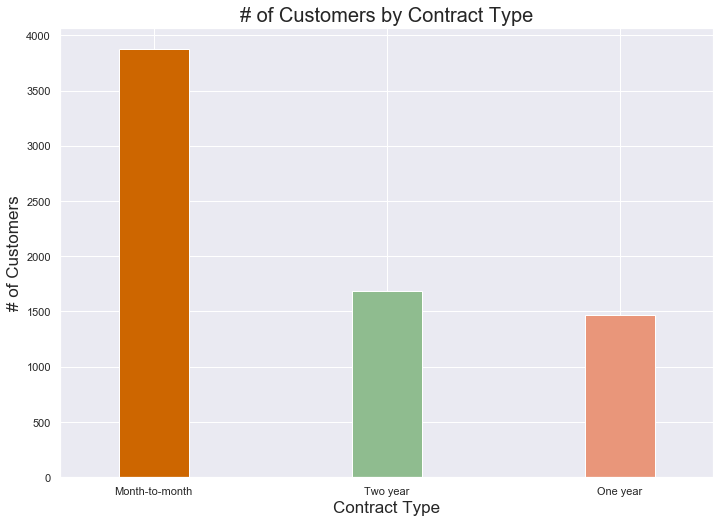

In [23]:
colors = ['#CD6600','#8FBC8F','#E9967A']

ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,color=colors )

# set labels, legend, title
ax.set_ylabel('# of Customers',fontsize =17)
ax.set_xlabel('Contract Type',fontsize =17)
ax.set_title('# of Customers by Contract Type',fontsize =20)

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Let's see distributions of customers base don their contracts,

Text(0.5,1,'Two Year Contract')

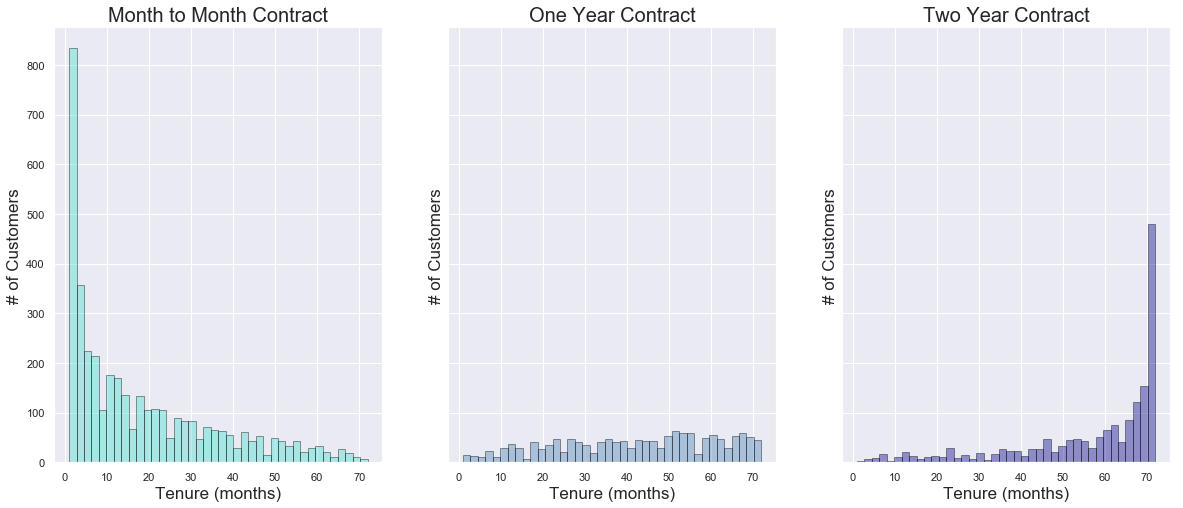

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,8))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(200/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)

# set labels and title
ax.set_ylabel('# of Customers',fontsize =17)
ax.set_xlabel('Tenure (months)',fontsize =17)
ax.set_title('Month to Month Contract',fontsize =20)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(200/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)

# set labels and title
ax.set_xlabel('Tenure (months)',fontsize =17)
ax.set_ylabel('# of Customers',fontsize =17)
ax.set_title('One Year Contract',fontsize =20)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(200/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

# set labels and title
ax.set_xlabel('Tenure (months)',fontsize =17)
ax.set_ylabel('# of Customers',fontsize =17)
ax.set_title('Two Year Contract',fontsize =20)

**Insights:**

1. Most contracts last for less than 10 months.
2. Customers with longer contracts (say 1/2 year) tend to stay with company for longer and are more loyal

Distributions for customers on:
- monthly contract is skewed to right.
- 1 year contract is uniform.
- 2 year contract is skewed to left.

###  C. Distributions of different services people have used

Many customers have used different services, we will analyze their distributions to check if we can see some interesting trends.

Services: 
- Phone Service
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies

In [25]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

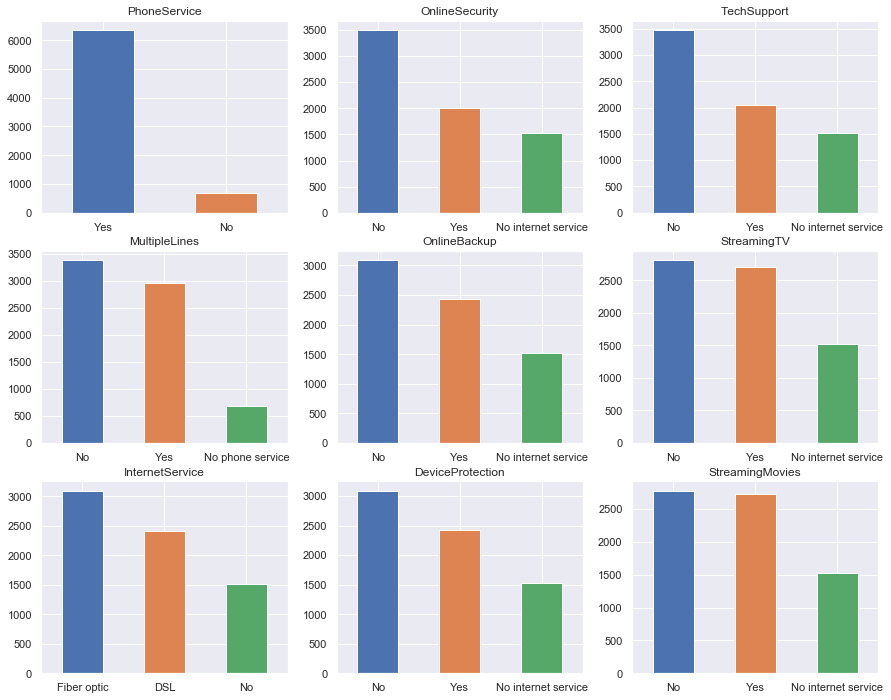

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### D) Relation b/w monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

Text(0.5,1,'Relation b/w monthly and total charges')

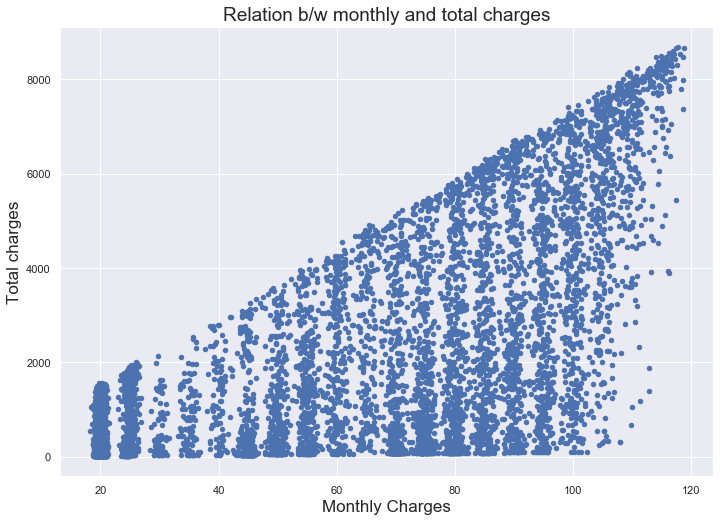

In [27]:
ax = telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y = 'TotalCharges')

# set labels and title
ax.set_xlabel('Monthly Charges', fontsize =17)
ax.set_ylabel('Total charges', fontsize =17)
ax.set_title('Relation b/w monthly and total charges', fontsize =19)

### E) Churn Rate

Text(0.5,1,'Churn Rate')

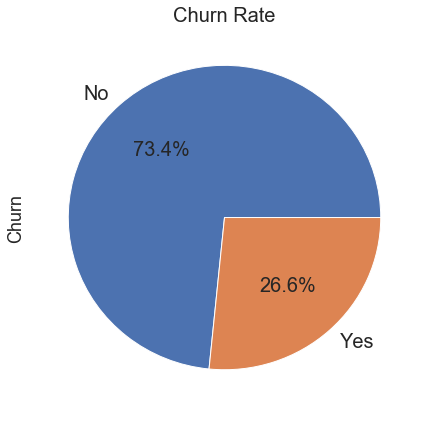

In [28]:
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', 
                                                                                      labels = ['No', 'Yes'],
                                                                                      figsize=(7,7), 
                                                                                      fontsize = 20) 
# set labels and title
ax.set_ylabel('Churn',size = 18)
ax.set_title('Churn Rate', size = 20)

We can see a big chunk of customer will not churn, this is what we would expect. Our data is skewed - 73.4% of custmoers will not churn and 26.6% customers are likely to leave.

### F.) Relationship b/w Churn and Variables

Explore important variables that were seen to have strong relationship with predictor variable (Churn) in the correlation plot.

**Important Variables:**
- Tenure
- Seniority
- Contract Type
- Monthly Charges
- Total Charges

**1.) Churn vs Tenure**:

Text(0.5,1,'Churn vs Tenure:')

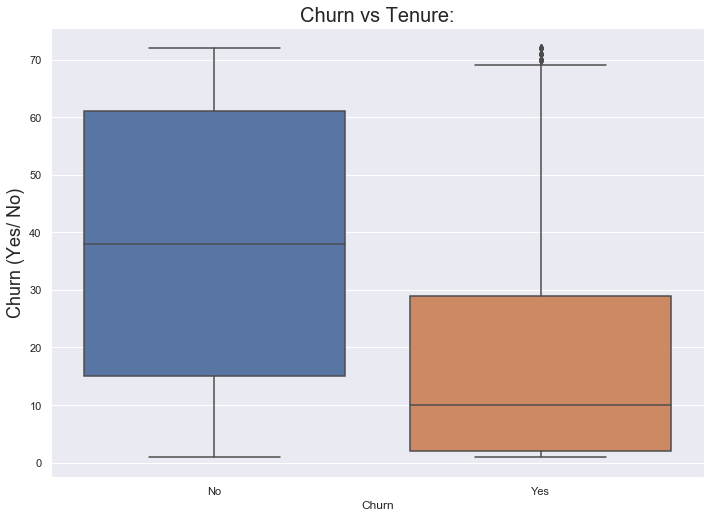

In [29]:
ax = sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

# set labels and title
ax.set_ylabel('Tenure',size = 18)
ax.set_ylabel('Churn (Yes/ No)',size = 18)
ax.set_title('Churn vs Tenure:', size = 20)

As expected, the customers who do not churn they tend to stay for a longer tenure with the telecom company whereas customers who churn they usually stay with telecom for smaller period.

**2.) Churn by Contract Type**:

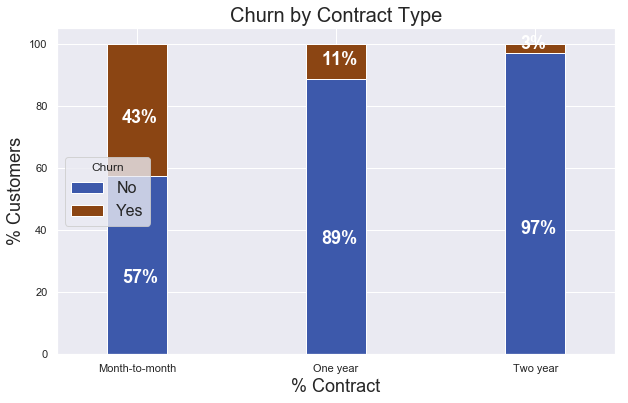

In [30]:
colors = ['#3D59AB','#8B4513']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.legend(prop={'size':16},title = 'Churn',loc='center left')
ax.set_ylabel('% Customers',size = 18)
ax.set_xlabel('% Contract',size = 18)
ax.set_title('Churn by Contract Type',size = 20)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 18)

**Insight:**
- Customers with monthly contract are most likely to churn.
- Customers with yearly contract are very least likely to leave.

**3.) Churn by Seniority**:

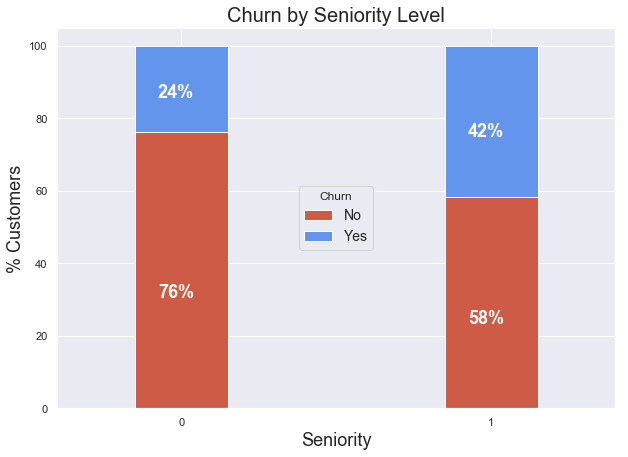

In [31]:
colors = ['#CD5B45','#6495ED']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,7),
                                                                color = colors)
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 18)
ax.set_xlabel('Seniority',size = 18)
ax.set_title('Churn by Seniority Level',size = 20)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =18)

**Insight:**
- Senior citizen are most likely to churn as compared to young people. 
- Infact, churn rate is double in older people as compared to younger population.


**4.) Churn by Monthly Charges**:

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Churn by Monthly Charges')

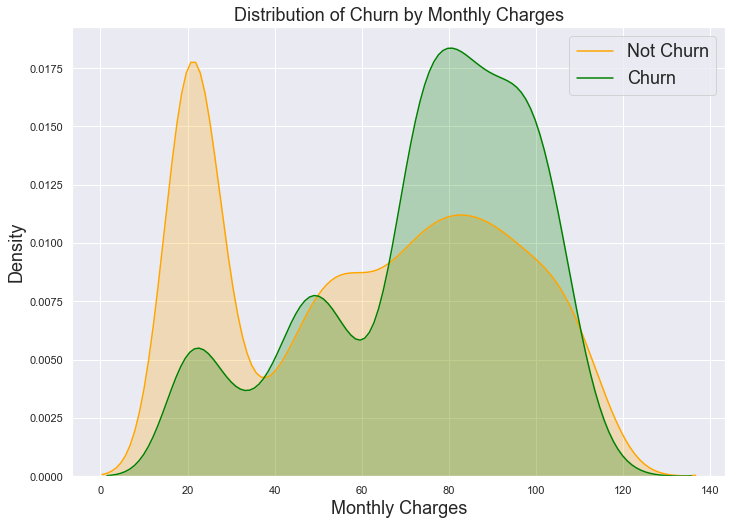

In [32]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Orange", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)

# set label. legen, title
ax.legend(["Not Churn","Churn"],loc='upper right',prop={'size':18})
ax.set_ylabel('Density',size = 18)
ax.set_xlabel('Monthly Charges',size = 18)
ax.set_title('Distribution of Churn by Monthly Charges',size = 18)

**Insights:** As monthly charges increase, customers are more likely to churn.

**5.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Churn by Total Charges')

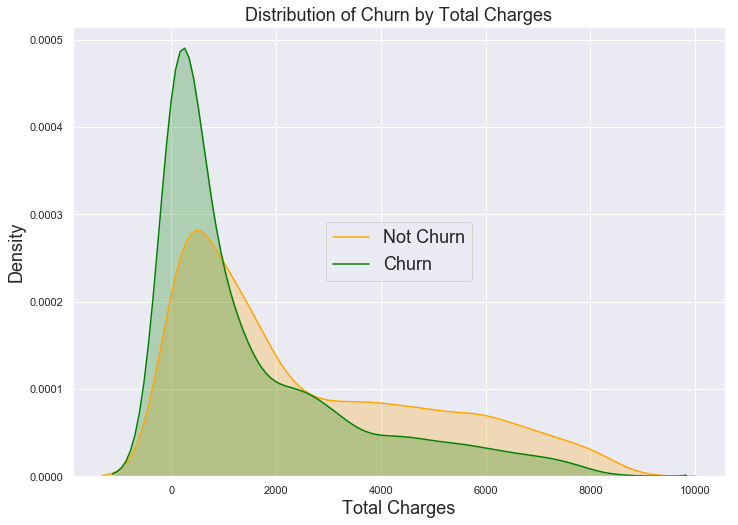

In [33]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Orange", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)

# set label. legen, title
ax.legend(["Not Churn","Churn"],loc='center',prop={'size':18})
ax.set_ylabel('Density',size = 18)
ax.set_xlabel('Total Charges',size = 18)
ax.set_title('Distribution of Churn by Total Charges',size = 18)

**Insights:** It seems that there is higer churn when the total charges are lower.